# K-Means From Scratch

Implementing K-Means clustering.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
np.random.seed(42)

---
## K-Means Class

In [2]:
class KMeansClassifier:
    def __init__(self, n_clusters=3, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.centroids = None
    
    def fit(self, X):
        # Initialize centroids randomly
        idx = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[idx]
        
        for _ in range(self.max_iters):
            # Assign points to nearest centroid
            labels = self._assign_clusters(X)
            
            # Update centroids
            new_centroids = np.array([X[labels == k].mean(axis=0) 
                                     for k in range(self.n_clusters)])
            
            # Check convergence
            if np.allclose(self.centroids, new_centroids):
                break
            
            self.centroids = new_centroids
        
        return self
    
    def _assign_clusters(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def predict(self, X):
        return self._assign_clusters(X)

print('K-Means class ready')

K-Means class ready


---
## Test on Synthetic Data

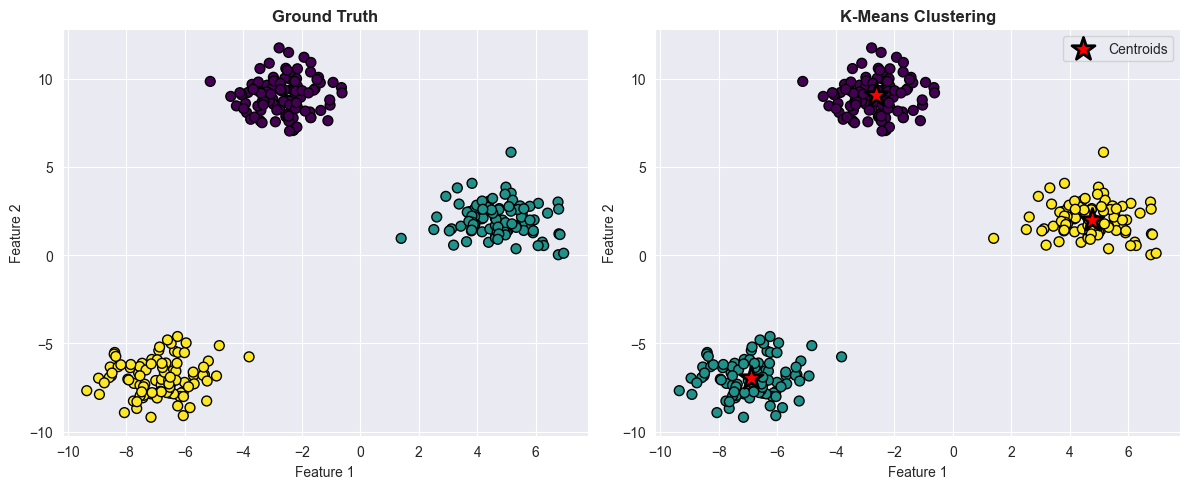

In [3]:
X, y_true = make_blobs(n_samples=300, centers=3, random_state=42)

# Our K-Means
km = KMeansClassifier(n_clusters=3)
km.fit(X)
y_pred = km.predict(X)

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, edgecolors='k')
plt.title('Ground Truth', fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, edgecolors='k')
plt.scatter(km.centroids[:, 0], km.centroids[:, 1], c='red', s=300, 
           marker='*', edgecolors='black', linewidth=2, label='Centroids')
plt.title('K-Means Clustering', fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
# Compare with sklearn
sklearn_km = KMeans(n_clusters=3, random_state=42, n_init=10)
sklearn_km.fit(X)

print(f'Our centroids:\n{km.centroids}\n')
print(f'Sklearn centroids:\n{sklearn_km.cluster_centers_}')

Our centroids:
[[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]

Sklearn centroids:
[[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]


---
## Summary

**Key Points:**
- K-Means partitions data into K clusters
- Iteratively assigns points and updates centroids
- Simple and fast for spherical clusters

**Key Point:** "K-Means minimizes within-cluster variance by alternating between assigning points to nearest centroids and updating centroids to cluster means."